### Student Information
Name:張家豪

Student ID:81373001H

GitHub ID:sxw4040

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
### Begin Assignment Here

# test code for environment setup
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt') # download the NLTK datasets
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Jack\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

In [3]:
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version) #3.11.0

c:\Users\Jack\Documents\DataM\DM2025Labs\DM2025-Lab1-Exercise\.venv\Scripts\python.exe
3.11.0 (main, Oct 24 2022, 18:26:48) [MSC v.1933 64 bit (AMD64)]


In [4]:
#Data Loading
NewData = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')
NewData

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [5]:
len(NewData)

847

In [6]:
#Exercise 1
for i in range(3):
    print(f"example {i+1}")
    print("\n".join(NewData.text[i].split("\n")))

example 1
Calls on retards
example 2
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3
Seeing lots of red in the ticker.


In [7]:
#Exercise 2
NewData.loc[NewData.index[[0,5]+[9,10]], "text"]

0                                      Calls on retards
5     Hoping to ejaculate in wet warm puss tonight, ...
9     HLGN is $10. Hurry and catch it now before it ...
10         It's a copy/paste from a Bloomberg terminal.
Name: text, dtype: object

In [8]:
#Exercise 3
N = NewData[["subreddit","title","text","sentiment","label"]]
N

,subreddit,title,text,sentiment,label
0,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,-1.0
1,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Stunt as in like why did they even make a big ...,1.0,0.0
2,StockMarket,How do you feel about a sitting president maki...,Seeing lots of red in the ticker.,0.0,0.0
3,stockstobuytoday,Who knows more? $VMAR,Vision Marine Technologies Inc. is rewriting t...,1.0,1.0
4,StockMarket,The Trump administration is begging Xi Jinping...,He didn’t say thank you.,0.0,-1.0
...,...,...,...,...,...
842,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Invest now it is going to shoot up tomorrow,0.0,1.0
843,StockMarket,$ U.S. dollar value (crashing),Where can I read this?,0.0,0.0
844,stockstobuytoday,Analyst Recommendations,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,0.0
845,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,i sold my puts so i expect cheeto to declare w...,0.0,-1.0


In [9]:
#Exercise 4
import helpers.data_mining_helpers as dmh #Functions
N.isnull().apply(lambda x: dmh.check_missing_values(x))

,subreddit,title,text,sentiment,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0


In [10]:
#Exercise 5
NewData[["downvotes","upvote_ratio"]].isnull()

,downvotes,upvote_ratio
0,True,True
1,True,True
2,True,True
3,False,False
4,True,True
...,...,...
842,True,True
843,True,True
844,False,False
845,True,True


In [11]:
#Exercise 6
N_sample = N.sample(n=500)
N_sample

,subreddit,title,text,sentiment,label
39,stocks,Formerly Stable US Treasuries Are Trading Like...,Other countries probably will go through a rec...,1.0,1.0
739,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,no state and local taxes,0.0,0.0
688,stockstobuytoday,Technical Analysis Thread.,Enter the ticker for which you want the techn...,0.0,0.0
786,stockstobuytoday,Analyst Recommendations,"Upgrades, Downgrades\r\n\r\n [Stock Analyst Re...",0.0,0.0
514,stocks,r/Stocks Daily Discussion & Fundamentals Frida...,SPY futes are red again yo,0.0,-1.0
...,...,...,...,...,...
396,stocks,BREAKING: China raises tariffs on U.S. goods t...,It's basically just bickering with math at thi...,1.0,-1.0
523,wallstreetbets,Weekly Earnings Thread 4/14 - 4/18,"Be advised, Netflix april 17th calls/puts will...",-1.0,-1.0
279,stocks,PRESIDENT TRUMP JUST ASKED THE SUPREME COURT F...,I mean to be fair you would not catch me holdi...,1.0,1.0
76,StockMarket,The Trump administration is begging Xi Jinping...,Americans are so brain dead lol,1.0,-1.0


<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

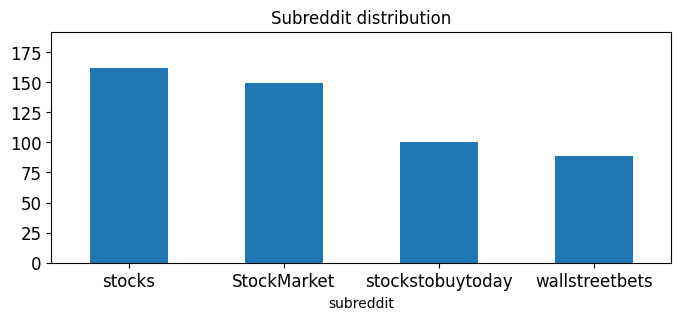

In [12]:
#Exercise 7
N_sample.subreddit.value_counts().plot(kind = 'bar',
                                       title = 'Subreddit distribution',
                                       ylim = [0, N_sample.subreddit.value_counts().max()+30], 
                                       rot = 0, fontsize = 12, figsize = (8,3))

<Axes: title={'center': 'Subreddit distribution'}, xlabel='subreddit'>

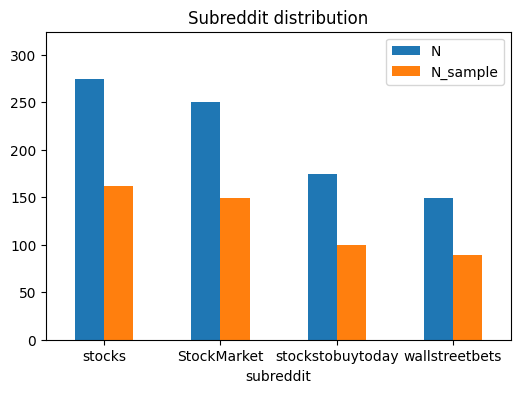

In [13]:
#Exercise 8
counts = pd.concat([N.subreddit.value_counts(), N_sample.subreddit.value_counts()], axis=1, keys=['N', 'N_sample']).fillna(0).astype(int)
counts.plot(kind = 'bar',
            title = 'Subreddit distribution',
            ylim = [0, N.subreddit.value_counts().max()+50], 
            rot = 0,
            fontsize = 10,
            figsize = (6,4))

In [14]:
#Exercise 9
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(N.text[1])

['stunt',
 'as',
 'in',
 'like',
 'why',
 'did',
 'they',
 'even',
 'make',
 'big',
 'deal',
 'about',
 'starting',
 'it',
 'in',
 'the',
 'first',
 'place',
 'no',
 'company',
 'should',
 'ever',
 'talk',
 'about',
 'politics',
 'ever']

In [15]:
#Exercise 10
N_counts = count_vect.fit_transform(N.text) #learn the vocabulary and return document-term matrix
idx = [list(np.where(row == 1)[0]) for row in N_counts[0, :].toarray()]
print(idx) #index
count_vect.get_feature_names_out()[idx] #words

[[np.int64(692), np.int64(2706), np.int64(3248)]]


array([['calls', 'on', 'retards']], dtype=object)

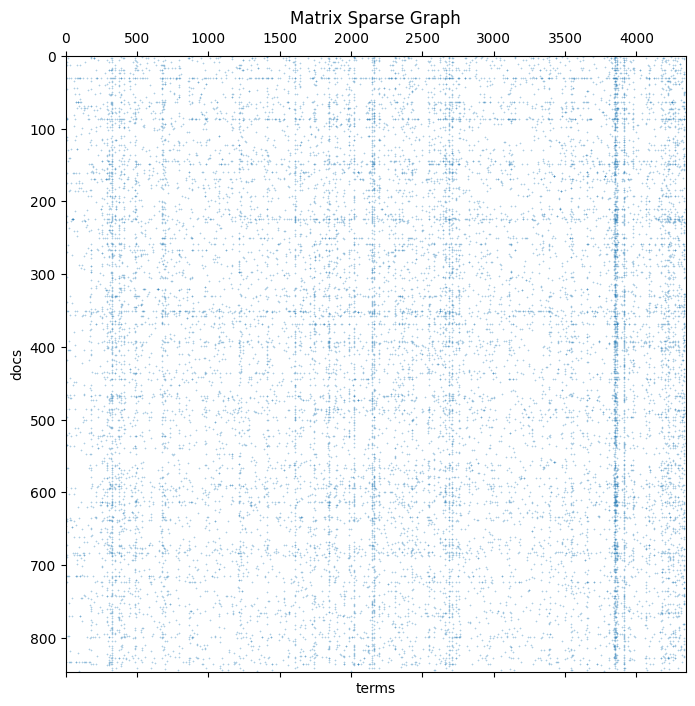

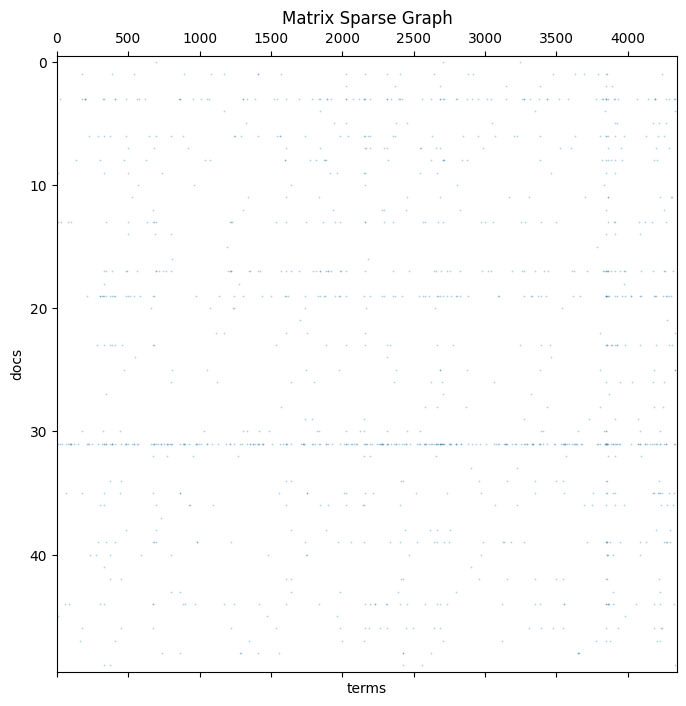

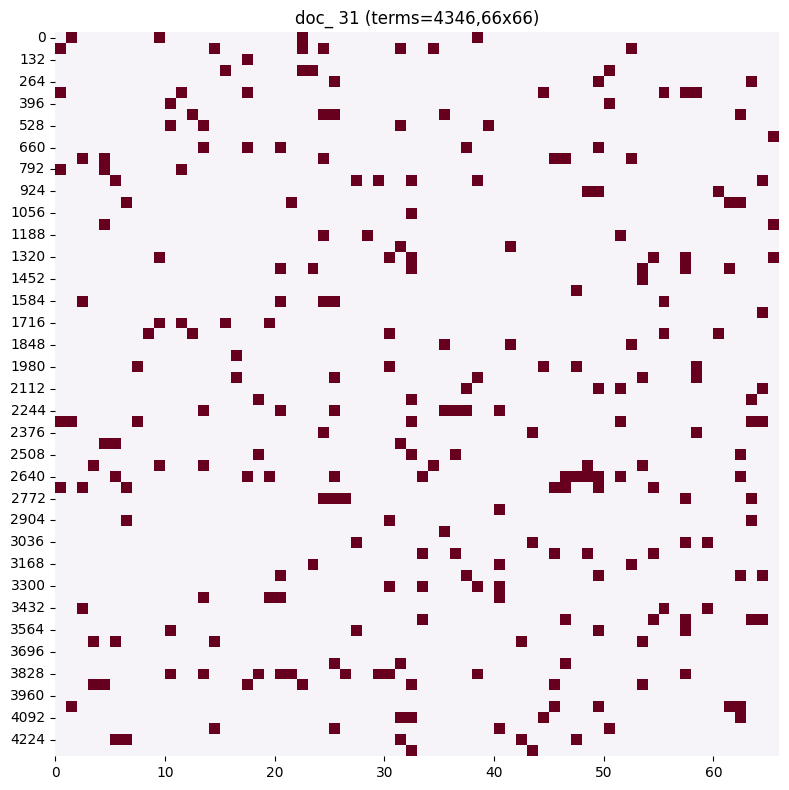

In [16]:
#Exercise 11
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil, sqrt

#總覽
plt.figure(figsize=(8,8))
plt.spy(N_counts, markersize=0.1, aspect='auto')
plt.title("Matrix Sparse Graph")
plt.xlabel("terms")
plt.ylabel("docs")

#搜索點數最密集的文件
plt.figure(figsize=(8,8))
plt.spy(N_counts[0:50], markersize=0.1, aspect='auto')
plt.title("Matrix Sparse Graph")
plt.xlabel("terms")
plt.ylabel("docs")

#僅看想呈現的文件，並以方形熱圖顯示分佈
doc_idx = 31  # doc索引

row = N_counts[doc_idx].toarray().ravel()   #轉成一維陣列
n = row.size                                #n = 4346
plot_xe = int(ceil(sqrt(n)))                #取最接近平方的寬
plot_ye = int(ceil(n / plot_xe))            #對應高度
pad = plot_ye * plot_xe - n
if pad:
    row = np.pad(row, (0, pad))  #缺值補0

grid = row.reshape(plot_ye, plot_xe) #轉為方形
draw_e = pd.DataFrame(grid, columns = np.arange(1, plot_xe+1), index = (np.arange(0, plot_ye))*plot_xe)

plt.figure(figsize=(8, 8))
ax = sns.heatmap(draw_e, cmap="PuRd", vmin=0, vmax=1, square=True,
                 cbar=False, annot=False)
ax.set_title(f"doc_ {doc_idx} (terms={n},{plot_xe}x{plot_ye})")
ax.set_xticks(np.arange(0, plot_xe+1,10))
ax.set_xticklabels(np.arange(0, plot_xe+1,10))
plt.tight_layout(); plt.show()

In [17]:
#Excercise 12
import plotly.express as px

term_frequencies = []
for j in range(0,N_counts.shape[1]):
    term_frequencies.append(sum(N_counts[:,j].toarray()))

term_frequencies = np.asarray(N_counts.sum(axis=0))[0]

df = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300],
    })

fig = px.bar(
    df,
    x="term", y="frequency",
    title=f"Term Frequencies"
)

fig.show()

In [18]:
#Excercise 13
min_freq = 10   #自訂頻率門檻
df_fr = df[df["frequency"] >= min_freq].copy() #刪除頻率過低的詞彙

fig = px.bar(
    df_fr,
    x="term", y="frequency",
    title=f"Term Frequencies (≥ {min_freq}) "
)

fig.update_layout(height=900)

fig.show()

In [19]:
#Excercise 14
df = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies[:300],
    })

fig = px.bar(
    df.sort_values("frequency", ascending=False),
    x="term", y="frequency",
    title=f"Term Frequencies"
)

fig.update_layout(height=900)

fig.show()

In [20]:
#Excercise 15
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

df = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[:300],
    "frequency": term_frequencies_log[:300],
    })

fig = px.bar(
    df.sort_values("frequency"),
    x="term", y="frequency",
    title=f"Term Frequencies Log Scale"
)

fig.show()


In [80]:
#Part 3 : please attempt the following tasks on "the new dataset"

#取 Top-K 的頻率詞彙並排序
K = 50
idx = np.argsort(term_frequencies)[::-1][:K]

df = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[idx],
    "frequency": term_frequencies[idx],
    "rank": np.arange(1, len(idx)+1)})

fig = px.bar(
    df.sort_values("frequency", ascending=False),
    x="term", y="frequency",
    title=f"Top {K} Term Frequencies")
fig.show()
f'頻率最高的都是介係詞'

#整體情緒標籤分佈
fig2 = px.bar(N["label"].value_counts().reset_index(name="count")
       .rename(columns={"index":"label"}),
       x="label", y="count", title="Label distribution")
fig2.show()

#子版各情緒標籤數量
fcount = pd.crosstab(N["subreddit"], N["label"]).reindex(columns=[-1,0,1], fill_value=0)
fig3 = px.bar(fcount.reset_index(names="subreddit"), x="subreddit", y=[-1, 0, 1], 
              barmode="group", title="Subreddit × Label distribution")
fig3.update_yaxes(range=[0, counts.to_numpy().max()+30])
fig3.show()
f'stockmarket版的負面貼文的比例更高'

#情緒標籤與內容長度關係
fig4 = px.scatter(N, x=N["text"].str.split().str.len(), y="label",
           title="Label vs. text length")
fig4.show()


#情緒與內容長度關係
fig5 = px.scatter(N, x=N["text"].str.split().str.len(), y="sentiment",
           title="Sentiment vs. text length")
fig5.show()
f'內容長度在情緒與標籤的反應上不相同，內容越多通常表示情緒越正面，但在標籤上則沒有明顯的關係'


'內容長度在情緒與標籤的反應上不相同，內容越多通常表示情緒越正面，但在標籤上則沒有明顯的關係'

# Phase 2

In [15]:
# === Finding Frequent Patterns with PAMI (Reddit 簡化版) ===
from time import perf_counter
import pandas as pd, re, tempfile

# 1) 讀取資料
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# 偵測文字欄位
text_col = next((c for c in ["clean_text","text","body","selftext","title"] if c in df.columns), None)
if text_col is None:
    raise ValueError(f"找不到文字欄位，現有欄位: {df.columns.tolist()}")

# 2) 簡單斷詞 + 抽樣
def tokenize(s):
    return re.findall(r"[a-zA-Z']+", str(s).lower())

sample = df[text_col].dropna().astype(str).head(1000)   # 抽 1000 篇避免過慢
tsv_path = tempfile.NamedTemporaryFile(prefix="reddit_", suffix=".tsv", delete=False).name

with open(tsv_path, "w", encoding="utf-8") as f:
    for text in sample:
        tokens = tokenize(text)
        if tokens:
            f.write("\t".join(tokens) + "\n")

print(f"交易檔已建立：{tsv_path}")

# 3) 載入 MaxFPGrowth
try:
    from PAMI.frequentPattern.maximal.MaxFPGrowth import MaxFPGrowth
except:
    from PAMI.frequentPattern.maximal.maxfpgrowth import MaxFPGrowth

# 4) 採礦：支援度閾值可自行調整
for minsup in [3, 6]:
    t0 = perf_counter()
    model = MaxFPGrowth(iFile=tsv_path, minSup=minsup)
    model.mine()
    patterns = model.getPatterns()
    t1 = perf_counter()

    print(f"\n=== MaxFPGrowth (minSup={minsup}) ===")
    print(f"執行時間: {t1 - t0:.3f} 秒, 發現 {len(patterns)} 筆頻繁項集")
    # 顯示前 10 個結果
    for i, (it, sup) in enumerate(list(patterns.items())[:10], 1):
        print(f"{i:>3}. {tuple(sorted(map(str, it)))}  sup={sup}")


交易檔已建立：C:\Users\Jack\AppData\Local\Temp\reddit_pqav_uoo.tsv


KeyboardInterrupt: 

In [ ]:
# Exercise 18
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 啟用 3D
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

texts = X['text'].astype(str).fillna("").values
labels = X['category_name'].astype(str).values
classes = np.unique(labels)

# 1) TF-IDF
tfidf = TfidfVectorizer(max_features=5000, min_df=3, stop_words='english')
M = tfidf.fit_transform(texts)   # 稀疏矩陣

# 2) 優先 UMAP→次選 t-SNE→最後 PCA
method = None
try:
    import umap
    reducer = umap.UMAP(n_components=3, n_neighbors=15, min_dist=0.1,
                        metric='cosine', random_state=42)
    Z = reducer.fit_transform(M)
    method = "UMAP-3D"
except Exception:
    try:
        P50 = PCA(n_components=min(50, M.shape[1]-1), random_state=42).fit_transform(M.toarray())
        tsne = TSNE(n_components=3, perplexity=30, init='pca', random_state=42, n_iter=1000)
        Z = tsne.fit_transform(P50)
        method = "t-SNE-3D"
    except Exception:
        Z = PCA(n_components=3, random_state=42).fit_transform(M.toarray())
        method = "PCA-3D"

print(f"{method}  shape={Z.shape}")

# 3) 繪圖：三個視角
views = [(20, 30), (20, 120), (60, 30)]

def plot_view(elev, azim, title):
    fig = plt.figure(figsize=(6,5))
    ax = fig.add_subplot(111, projection='3d')
    for c in classes:
        idx = (labels == c)
        ax.scatter(Z[idx,0], Z[idx,1], Z[idx,2], s=10, alpha=0.75, label=c)
    ax.set_xlabel('Dim1'); ax.set_ylabel('Dim2'); ax.set_zlabel('Dim3')
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"{method}  elev={elev}, azim={azim}")
    ax.legend(fontsize=8, loc='best')
    plt.tight_layout(); plt.show()

for v in views: plot_view(*v, title="")


NameError: name 'X' is not defined

In [8]:
# Part 3

import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report

# 1) 讀資料
df = pd.read_csv("newdataset/Reddit-stock-sentiment.csv")

# 偵測文字與類別欄位
text_col = next((c for c in ["clean_text","text","body","selftext","title"] if c in df.columns), None)
cat_col  = next((c for c in ["subreddit","category","category_name","topic"] if c in df.columns), None)
if text_col is None or cat_col is None:
    raise ValueError(f"找不到 text 或 category 欄位。現有欄位：{df.columns.tolist()}")

# 填空
df[text_col] = df[text_col].fillna("")

# 2) 訓練/測試分割
X_train, X_test, y_train, y_test = train_test_split(
    df[text_col], df[cat_col], test_size=0.3, random_state=42, stratify=df[cat_col]
)

# === (A) Word Frequency features ===
count_vect = CountVectorizer(max_features=5000, min_df=3, stop_words="english")
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts  = count_vect.transform(X_test)

nb_count = MultinomialNB()
nb_count.fit(X_train_counts, y_train)
y_pred_count = nb_count.predict(X_test_counts)

print("=== Word Frequency (CountVectorizer + MultinomialNB) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_count))
print(classification_report(y_test, y_pred_count, digits=4))

# === (B) TF-IDF features ===
tfidf_vect = TfidfVectorizer(max_features=5000, min_df=3, stop_words="english")
X_train_tfidf = tfidf_vect.fit_transform(X_train)
X_test_tfidf  = tfidf_vect.transform(X_test)

# BernoulliNB 在 TF-IDF（連續權重）上通常表現更穩定，也可用 MultinomialNB 作比較
nb_tfidf = BernoulliNB()
nb_tfidf.fit(X_train_tfidf > 0, y_train)     # >0 將 TF-IDF 二值化
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf > 0)

print("\n=== TF-IDF (TfidfVectorizer + BernoulliNB) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_tfidf))
print(classification_report(y_test, y_pred_tfidf, digits=4))

=== Word Frequency (CountVectorizer + MultinomialNB) ===
Accuracy: 0.4980392156862745
                  precision    recall  f1-score   support

     StockMarket     0.5455    0.5600    0.5526        75
          stocks     0.4220    0.5542    0.4792        83
stockstobuytoday     0.5882    0.5769    0.5825        52
  wallstreetbets     0.5000    0.2000    0.2857        45

        accuracy                         0.4980       255
       macro avg     0.5139    0.4728    0.4750       255
    weighted avg     0.5060    0.4980    0.4877       255


=== TF-IDF (TfidfVectorizer + BernoulliNB) ===
Accuracy: 0.4666666666666667
                  precision    recall  f1-score   support

     StockMarket     0.3728    0.8400    0.5164        75
          stocks     0.7027    0.3133    0.4333        83
stockstobuytoday     0.6667    0.4615    0.5455        52
  wallstreetbets     0.4615    0.1333    0.2069        45

        accuracy                         0.4667       255
       macro avg    

In [ ]:
# Part 4

# 貼文含網址、表情符號、股票代號未處理。  
# 未做詞形還原或移除停用詞。  
# 各子版主題相似，詞彙差異小。  
# Naive Bayes 未調整超參數。  